In [1]:
import os

import seaborn as sns
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.image as mpimg

In [2]:
sns.set_theme()

In [3]:
working_dir = r'\\export.hpc.ut.ee\gis\Ditches\working\paper_materials'
os.chdir(working_dir)

In [4]:
map_sheets = [53972, 54591]
numeric_ids = [8, 19]

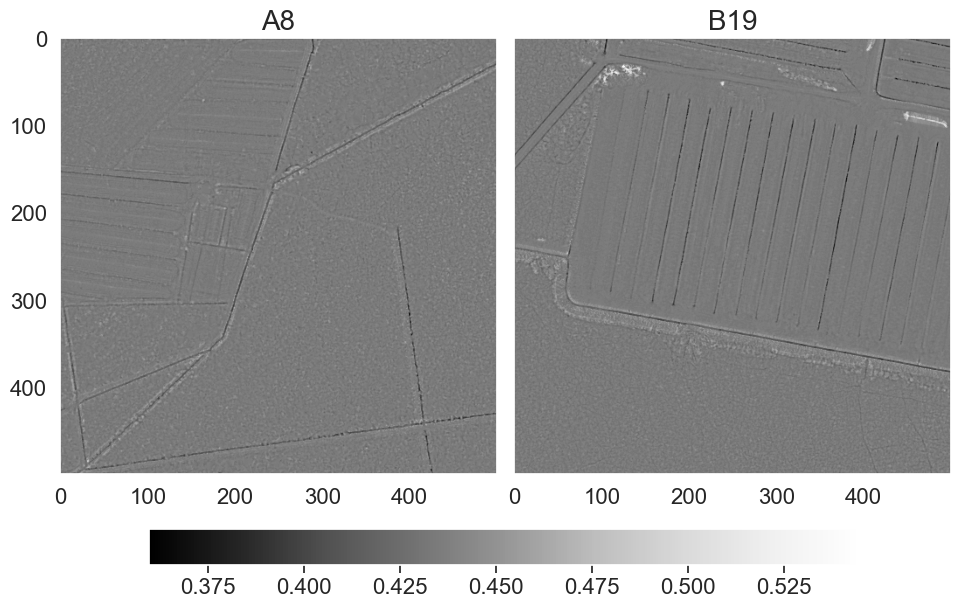

In [5]:
vmin = 1
vmax = 0

for i in range(len(map_sheets)):
    map_sheet = map_sheets[i]
    numeric_id = numeric_ids[i]
    src = rasterio.open(fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\finetuning\hpmf_norm\{map_sheet}_{numeric_id}.tif')
    array = src.read(1)
    if array.min() < vmin:
        vmin = array.min()
    if array.max() > vmax:
        vmax = array.max()
        
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, layout='compressed')
for i in range(len(map_sheets)):
    map_sheet = map_sheets[i]
    numeric_id = numeric_ids[i]
    tiles = gpd.read_file(f'./{map_sheet}_digitized_tiles.gpkg')
    text_id = tiles[tiles['numeric_id'] == numeric_id]['text_id'].values[0]
    ax = axes[i]
    src = rasterio.open(fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\finetuning\hpmf_norm\{map_sheet}_{numeric_id}.tif')
    im = ax.imshow(src.read(1), cmap='Greys_r', vmin=vmin, vmax=vmax)
    ax.grid(False)
    ax.set_title(text_id, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=16)
cbar = fig.colorbar(im, ax=axes, location='bottom', orientation='horizontal', shrink=0.8)
cbar.ax.tick_params(labelsize=16)
plt.savefig('./figures/hpmf_norm_tiles.png', dpi=300, bbox_inches='tight')

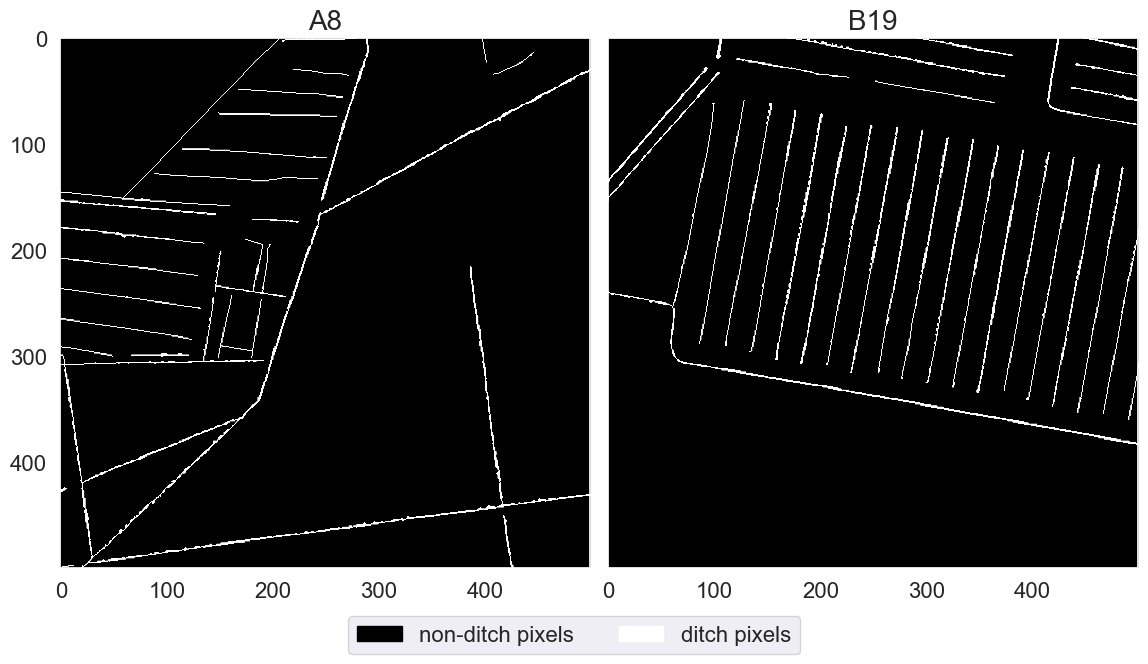

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True, layout='compressed')
for i in range(len(map_sheets)):
    map_sheet = map_sheets[i]
    numeric_id = numeric_ids[i]
    tiles = gpd.read_file(f'./{map_sheet}_digitized_tiles.gpkg')
    text_id = tiles[tiles['numeric_id'] == numeric_id]['text_id'].values[0]
    ax = axes[i]
    src = rasterio.open(fr'\\export.hpc.ut.ee\gis\Ditches\working\deep_learning\data\finetuning\labels\{map_sheet}_{numeric_id}.tif')
    im = ax.imshow(src.read(1), cmap='Greys_r', vmin=vmin, vmax=vmax)
    ax.grid(False)
    ax.set_title(text_id, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=16)
handles = [mpatches.Patch(color='black', label='non-ditch pixels'), mpatches.Patch(color='white', label='ditch pixels')]
fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.1), fontsize=16)
plt.savefig('./figures/labels_tiles.png', dpi=300, bbox_inches='tight')

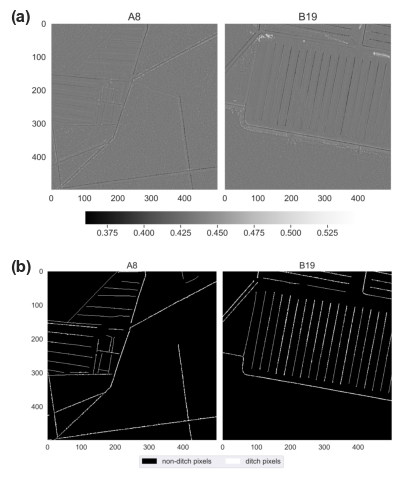

In [7]:
# Combine plots
images = ['./figures/hpmf_norm_tiles.png', './figures/labels_tiles.png']
letters = ['(a)', '(b)']
fig, axes = plt.subplots(2, 1, layout='compressed')
for image, letter, ax in zip(images, letters, axes.flatten()):
    img = mpimg.imread(image)
    ax.imshow(img)
    ax.axis('off')
    ax.text(-0.05, 1, letter, transform=ax.transAxes, fontsize=12, fontweight='bold', verticalalignment='top')
plt.savefig(f'./figures/hpmf_norm_labels_tiles.png', dpi=300, bbox_inches='tight')